<a href="https://colab.research.google.com/github/JorgeRR89/Empirical-Cumulative-Distribution-Function-ECDF/blob/main/Empirical_Cumulative_Distribution_Function_(ECDF)_mod_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empirical Cumulative Distribution Function (ECDF) on Bimodal Data

This project demonstrates how to use the Empirical Cumulative Distribution Function (ECDF) to analyze data that does not follow a standard probability distribution such as the normal or binomial distribution.

Instead of assuming a theoretical distribution, the ECDF uses the observed data directly to estimate probabilities and answer questions about future observations.

The example in this notebook generates a bimodal dataset representing exam scores for students in a state-wide exam and uses ECDF to estimate probabilities of different score ranges.

---

## Overview

In many real-world situations, data is not well described by common distributions (normal, binomial, etc.). When this happens, one option is to work with the **Empirical Cumulative Distribution Function (ECDF)**, which is defined as:

\[
\text{ECDF}(x) = \frac{\text{Number of observations } \le x}{\text{Total number of observations}}
\]

This notebook:

- Creates a synthetic **bimodal** dataset by combining two normal distributions.
- Interprets the data as exam scores between 0 and 100.
- Uses ECDF to estimate the probabilities of scores being below, above, or within certain thresholds.
- Visualizes both the histogram of scores and the empirical CDF.

---

## What the Notebook Covers

### 1. Generate a Bimodal Dataset

- Two normal distributions are created:
  - One centered around 80 (e.g., high-performing group).
  - One centered around 60 (e.g., main population).
- These samples are combined into a single array to form a bimodal distribution.

```python
from numpy.random import normal
from numpy import hstack

sample1 = normal(loc=80, scale=5, size=300)
sample2 = normal(loc=60, scale=5, size=700)
sample = hstack((sample1, sample2))


So far, you have had experience predicting data which fits probability distribution such as normal and binomial distribution. However, data does not always fit nicely against these well-known distribution types. When this occurs, one of your options is to use the Empirical Cumulative Distribution Function (ECDF) and historical data to predict future data values.

The ECDF is calculated by ordering all of the unique observations in the data sample and calculating the cumulative probability for each as the number of observations less than or equal to a given observation divided by the total number of observations.

In this activity, you will use Python to create a sample dataset and analyze the ECDF against the generated data. First let us start by creating a non-normally distributed data set. We can do this by creating a two-peak dataset by combining two normal distributions.

In [ ]:
# example of a bimodal data sample
import numpy as np
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
# generate a sample
sample1 = normal(loc=80, scale=5, size=300)
sample2 = normal(loc=60, scale=5, size=700)
sample = hstack((sample1, sample2))

sample

array([78.6906588 , 84.42284635, 81.38484804, 79.3643311 , 76.31672695,
       73.6756749 , 71.81989449, 72.08924781, 82.57704802, 74.126373  ,
       83.55046967, 78.96116768, 79.37215632, 74.81499169, 77.38880141,
       78.08790329, 79.12704161, 92.12375906, 78.54117626, 76.66520516,
       82.00933386, 84.64849012, 83.57593419, 79.97991437, 76.34478542,
       88.0932239 , 86.78279695, 84.98650353, 80.47734656, 82.33280241,
       76.95565403, 79.74841805, 87.09982924, 79.56727031, 81.71759929,
       88.81635825, 82.16500375, 74.05662205, 83.19075624, 85.33753521,
       80.59221061, 82.22442356, 82.9120907 , 78.30387522, 80.27708716,
       74.39611796, 76.99271288, 78.14152521, 74.68534278, 80.77386343,
       87.59324136, 82.58840744, 74.16644335, 84.80893847, 71.64109366,
       79.19374365, 77.78398838, 86.79198923, 80.05785016, 83.23404411,
       68.91393338, 79.78386445, 66.83644882, 75.62971527, 85.40883078,
       80.26627881, 80.9731092 , 85.67112984, 82.39353814, 80.48

This dataset will represent an entire state's benchmark score on their state exam. Their scores can be any number between 0 and 100 (extra credit was not an option). Printing the data out like this does not do much, so let us view a histogram of the data to visuaslize it more.

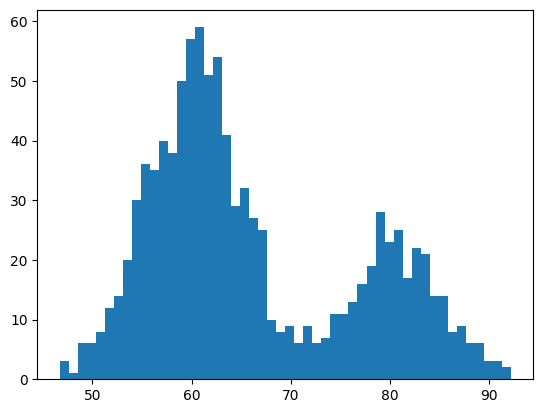

In [ ]:
pyplot.hist(sample, bins=50)
pyplot.show()

As you can see, this is **not normally distributed**. Let us find some other information out about the exam scored.

In [ ]:
from tabulate import tabulate

def range(x, axis=0):
    return np.max(x, axis=axis) - np.min(x, axis=axis)

data = [
["Mean: ", np.mean(sample)],
["Max Score", np.max(sample)],
["Min Score", np.min(sample)],
["Range:", range(sample)]]

print (tabulate(data))

---------  -------
Mean:      66.136
Max Score  92.2138
Min Score  46.7222
Range:     45.4916
---------  -------


From this we can see the highest score was 94%, lowest was a 43% with an average of 65%. Let us use the empirical distribution function to find the probability of future student's receiving certain scores.

In [ ]:
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(sample)

data = [
["P(x<94): ", ecdf(94)],
["P(x<44): ", ecdf(44)],
["P(x<Mean):", ecdf(np.mean(sample))]]

print (tabulate(data))


----------  -----
P(x<94):    1
P(x<44):    0
P(x<Mean):  0.634
----------  -----


One thing that is noteworthy about the previous step, is we discovered that although the average score was a 65%, there is an above average probability a random student's score is below the average. As seen in previous modules, statistically calculating what you'd expect a random varaible to be can often be vastly different than what you would discover using probability.

Let us take a look at the probability a student's score falls within the following ranges.

In [ ]:
data = [
["P(x>90): ", 1 - ecdf(90)],
["P(x>75): ", 1 - ecdf(75)],
["P(x<50):", ecdf(50)]]

print (tabulate(data))

--------  -----
P(x>90):  0.006
P(x>75):  0.258
P(x<50):  0.012
--------  -----


Lastley, let us visualize the explanation of this by printing out the empirical distribution's CDF.

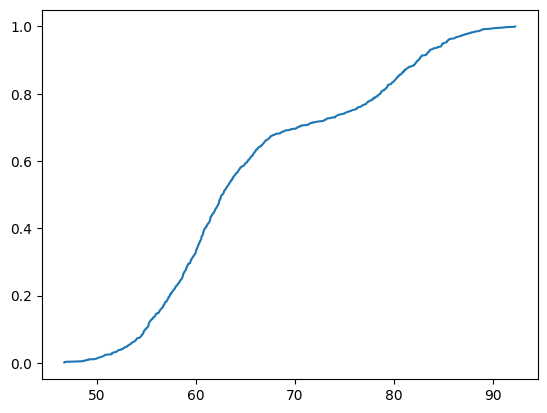

In [ ]:

# plot the cdf of the empirical distribution
pyplot.plot(ecdf.x, ecdf.y)
pyplot.show()


---

###  Conclusions


- The dataset we generated is clearly bimodal and does not follow a normal distribution, which makes traditional parametric approaches less appropriate on their own.
- By using the Empirical Cumulative Distribution Function (ECDF), we can estimate probabilities directly from the observed data without assuming any specific theoretical distribution.
- The ECDF reveals that, even though the average score is around 65, there is a relatively high probability that a randomly selected student will score below this mean. This highlights the difference between summary statistics (like the mean) and the full distribution of the data.
- Probability questions such as P(X < 94), P(X < 44), P(X > 90), or P(X < 50) can be answered in a straightforward way using ECDF values.
- Visualizing the ECDF helps to understand how cumulative probability accumulates across the range of scores and provides an intuitive view of the distribution’s shape.
- Overall, ECDF is a powerful tool when data does not fit common distributions, enabling data-driven probability estimates based purely on historical observations.
